In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# utils

def load_pkl(fname: str):
    with open(fname, 'rb') as f:
        result = pickle.load(f)
    return result

### Load $a^*$
= anomaly scores with a specific a latent window size rate

In [5]:
# load the pickle resulting data

dataset_index = 1
latent_window_size_rate = 0.3  # "latent_window_size = r_w x latent_window_size", where r_w denotes the latent window size rate; it can be one of {0.1, 0.3, 0.5}

result = load_pkl(os.path.join('resulting_anomaly_score_data', f'{dataset_index}-anomaly_score-latent_window_size_rate_{latent_window_size_rate}.pkl'))

In [6]:
result

{'dataset_index': 1,
 'latent_window_size_rate': 0.3,
 'latent_window_size': 7,
 'rolling_window_stride_rate': 0.1,
 'q': 0.99,
 'X_test_unscaled': array([ -95.85533 ,  -96.993774, -102.16311 , ...,  129.2448  ,
         118.84613 ,  115.96236 ], dtype=float32),
 'Y': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'a_star': array([[2.00722265, 2.00722265, 2.00722265, ..., 2.7217443 , 2.7217443 ,
         2.7217443 ],
        [4.22146225, 4.22146225, 4.22146225, ..., 1.63641214, 1.63641214,
         1.63641214],
        [0.37845558, 0.37845558, 0.37845558, ..., 0.18651627, 0.18651627,
         0.18651627]]),
 'X_recons_test': array([-103.16737366, -103.63419342,  -96.31137848, ...,  139.40692139,
         140.39065552,  137.19549561]),
 'timestep_rng_test': range(0, 44385, 41),
 'anom_threshold': array([26.26836145, 21.07799649, 14.69234258])}

**Details of the stored data keys**
* dataset_index: dataset index
* latent_window_size_rate: latent window size rate, notated as $r_w$
* latent_window_size: latent window size
* rolling_window_stride_rate: determines a stride size (i.e., rolling_window_stride) as a window size $T$ multiplied by rolling_window_stride_rate.
* q: quantile to determine the anomaly score threshold
* X_test_unscaled: a test data (time series) without any scaling
* Y: labels with 0 indicating non-anomaly and 1 indicating anomaly
* a_star: $a^*$
* X_recons_test: a reconstruction of the test time series; to see if the encoder and decoder can compress and decompress the data properly.
* timestep_rng_test: a range of $t$ to produce a window that spans $t$ to $t+T$ to get $x$; the stride size denotes rolling_window_stride.
* anom_threshold: the threshold values for the different frequency bands; the first element corresponds to the lowest frequency band and vice versa.

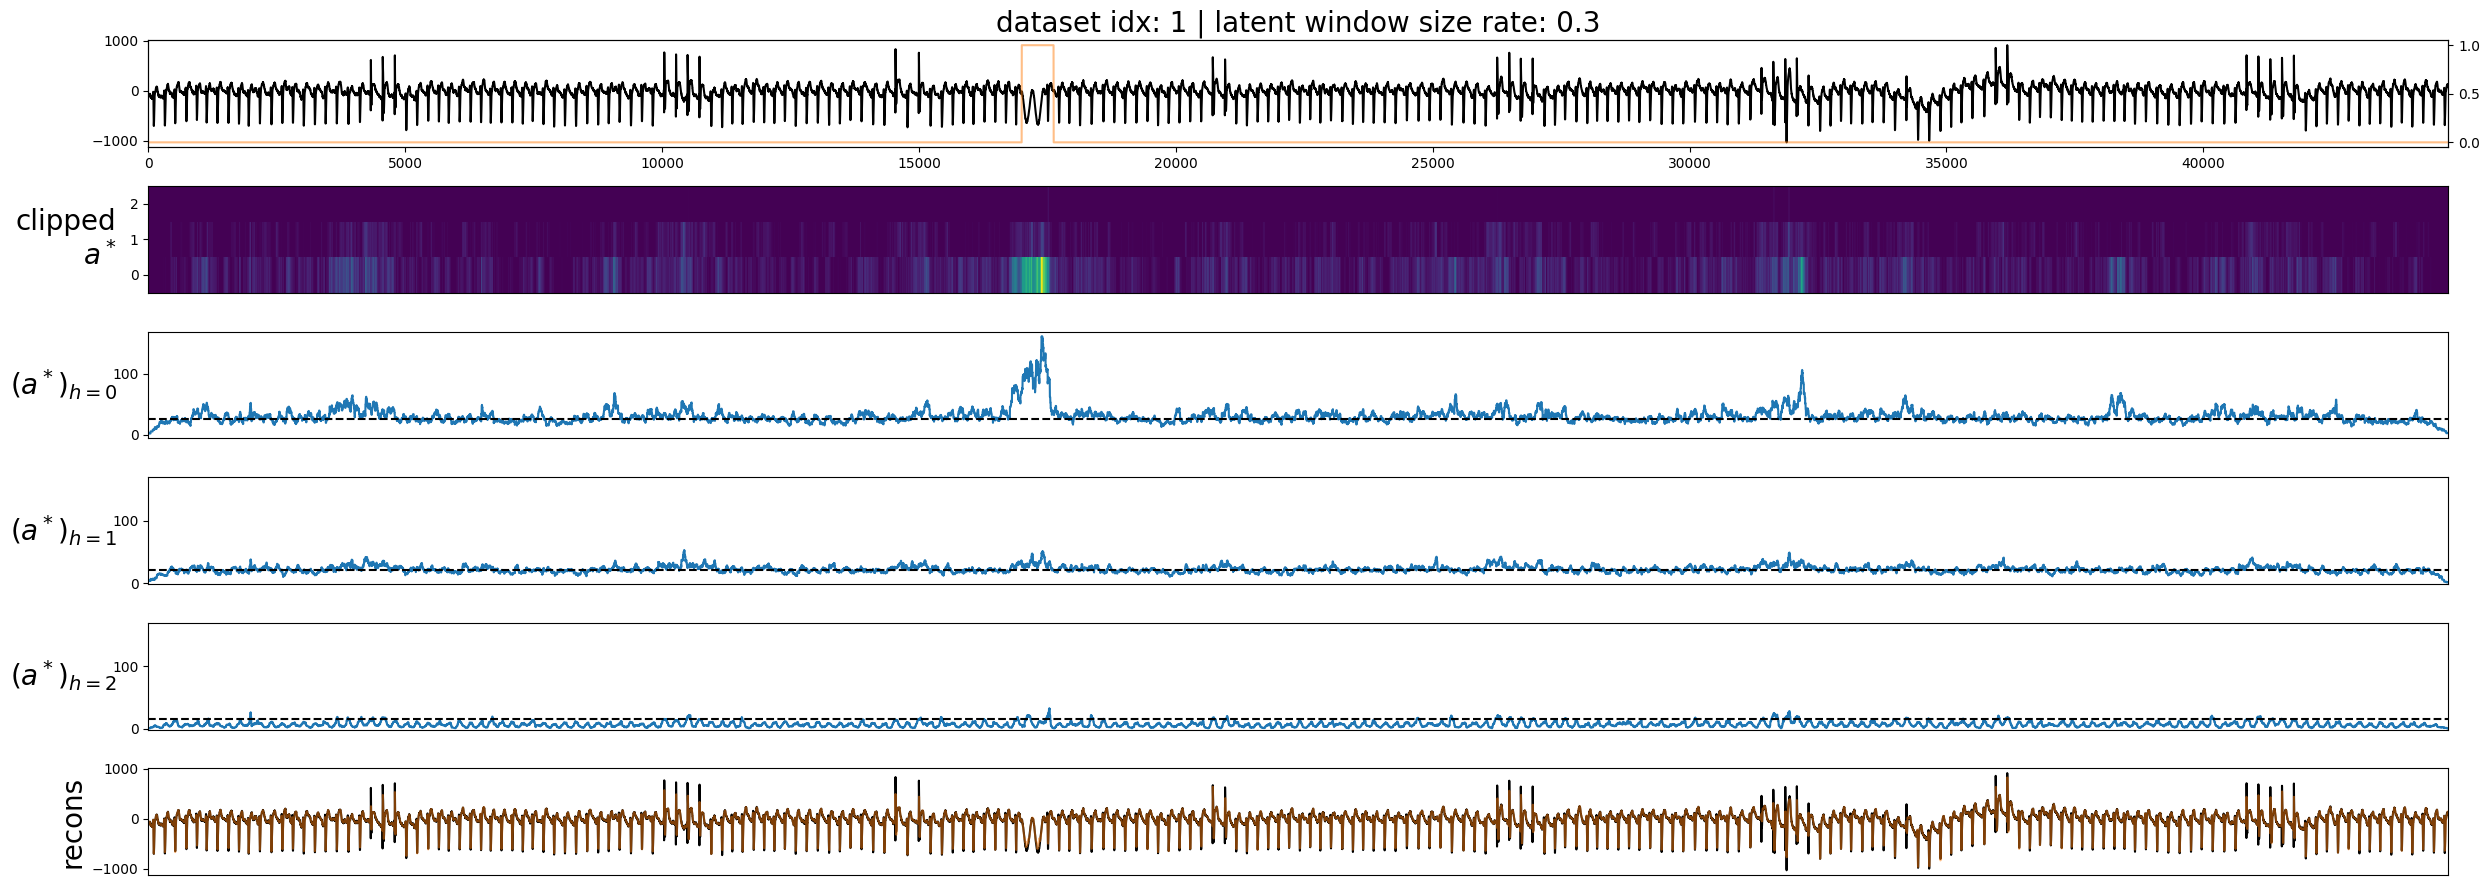

In [8]:
# take out some vars for plotting
X_test_unscaled = result['X_test_unscaled']
Y = result['Y']
a_star = result['a_star']
anom_threshold = result['anom_threshold']
X_recons_test = result['X_recons_test']

# plot
n_rows = 6
fig, axes = plt.subplots(n_rows, 1, figsize=(25, 1.5 * n_rows))

# plot: X_test & labels
i = 0
axes[i].plot(X_test_unscaled, color='black')
axes[i].set_xlim(0, X_test_unscaled.shape[0] - 1)
axes[i].set_title(f"dataset idx: {dataset_index} | latent window size rate: {latent_window_size_rate}", fontsize=20)
ax2 = axes[i].twinx()
ax2.plot(Y, alpha=0.5, color='C1')

# plot (imshow): anomaly score
i += 1
vmin = np.nanquantile(np.array(a_star).flatten(), q=0.5)  # q to remove the insignificant values in imshow.
axes[i].imshow(a_star, interpolation='nearest', aspect='auto', vmin=vmin)
axes[i].invert_yaxis()
axes[i].set_xticks([])
ylabel = 'clipped\n' + r'$a^*$'
axes[i].set_ylabel(ylabel, fontsize=20, rotation=0, labelpad=10, ha='right', va='center')

ylim_max = np.max(a_star) * 1.05
for j in range(a_star.shape[0]):
    i += 1
    axes[i].plot(a_star[j])
    axes[i].set_xticks([])
    xlim = (0, a_star[j].shape[0] - 1)
    axes[i].set_xlim(*xlim)
    axes[i].set_ylim(None, ylim_max)
    h_idx = f'h={j}'
    axes[i].set_ylabel(r'$(a^*)_{{{}}}$'.format(h_idx),
                       fontsize=20, rotation=0, labelpad=35, va='center')
    threshold = 1e99 if anom_threshold[j] == np.inf else anom_threshold[j]
    axes[i].hlines(threshold, xmin=xlim[0], xmax=xlim[1], linestyle='--', color='black')

# plot: reconstruction
i += 1
axes[i].plot(X_test_unscaled, color='black')
axes[i].plot(X_recons_test, alpha=0.5, color='C1')
axes[i].set_xticks([])
axes[i].set_xlim(0, X_test_unscaled.shape[0] - 1)
axes[i].set_ylabel('recons', fontsize=20)

plt.tight_layout()
plt.show()

### Load $a^*_s$, $\bar{a}_s^*$, $\bar{\bar{a}}_s^*$, $a_\text{final}$
* $a_\text{final}$: final anomaly scores

In [10]:
# load the pickle resulting data

result = load_pkl(os.path.join('resulting_anomaly_score_data', f'{dataset_index}-joint_anomaly_score.pkl'))

In [11]:
result

{'dataset_index': 1,
 'X_test_unscaled': array([ -95.85533 ,  -96.993774, -102.16311 , ...,  129.2448  ,
         118.84613 ,  115.96236 ], dtype=float32),
 'Y': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'a_s^*': array([[6.93544078, 6.93544078, 6.93544078, ..., 6.62790489, 6.62790489,
         6.62790489],
        [9.13346195, 9.13346195, 9.13346195, ..., 4.07729936, 4.07729936,
         4.07729936],
        [1.96352416, 1.96352416, 1.96352416, ..., 1.25098039, 1.25098039,
         1.25098039]]),
 'bar{a}_s^*': array([6.01080896, 6.01080896, 6.01080896, ..., 3.98539488, 3.98539488,
        3.98539488]),
 'doublebar{a}_s^*': array([18.28295641, 18.34227582, 18.42278702, ..., 16.16911919,
        16.10800289, 16.04629033]),
 'a_final': array([12.14688269, 12.17654239, 12.21679799, ..., 10.07725704,
        10.04669888, 10.0158426 ]),
 'joint_threshold': array([81.60380445, 63.64846772, 43.51881631]),
 'final_threshold': 62.92369615932307}

**Details of the stored data keys**
* a_s^\*: $a_s^*$
* bar{a}_s^\*: $\bar{a}_s^*$
* doublebar{a}_s^\*: $\bar{\bar{a}}_s^*$
* a_final: $a_\text{final}$
* joint_threshold: a summation of `anom_threshold` across different latent_window_size_rate-s
* final_threshold: an average of `joint_threshold` across different frequency bands.

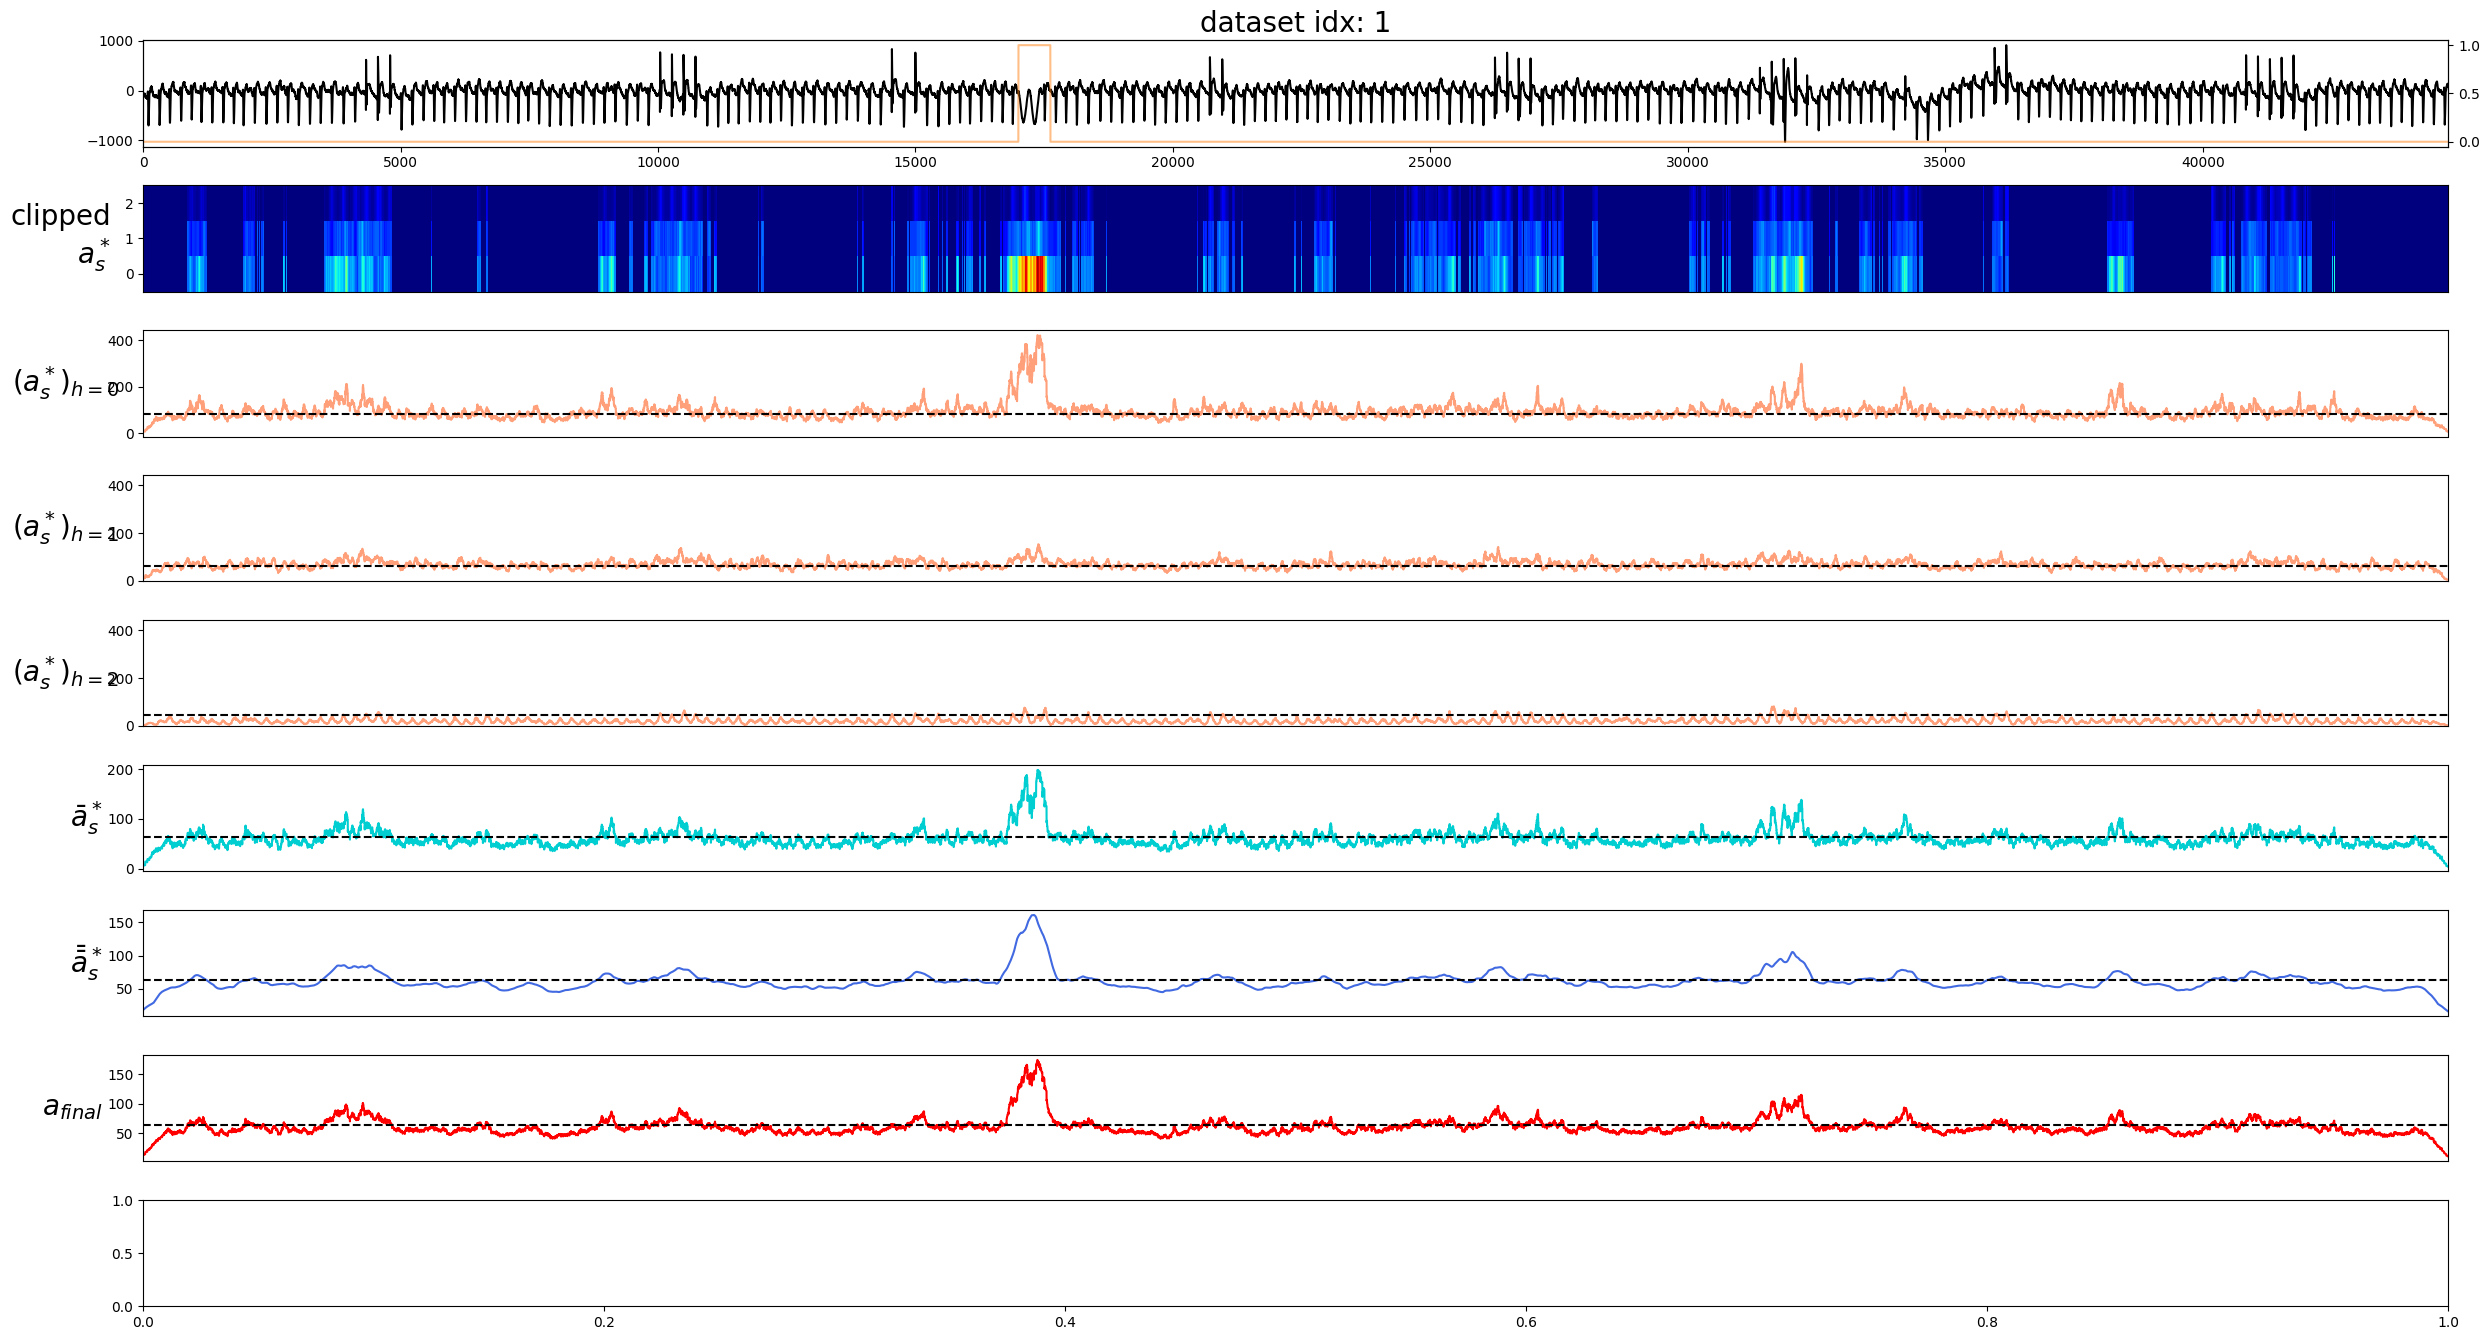

In [12]:
# take out some vars for plotting
a_s_star = result['a_s^*']
a_bar_s_star = result['bar{a}_s^*']
a_2bar_s_star = result['doublebar{a}_s^*']
a_final = result['a_final']
joint_threshold = result['joint_threshold']
final_threshold = result['final_threshold']

# plot
n_rows = 9
fig, axes = plt.subplots(n_rows, 1, figsize=(25, 1.5 * n_rows))

# plot: X_test & labels
i = 0
axes[i].plot(X_test_unscaled, color='black')
axes[i].set_xlim(0, X_test_unscaled.shape[0] - 1)
axes[i].set_title(f"dataset idx: {dataset_index}", fontsize=20)
ax2 = axes[i].twinx()
ax2.plot(Y, alpha=0.5, color='C1')

# plot (imshow): a_s^*
i += 1
anom_ind = a_final > final_threshold
a_s_star_clipped = np.copy(a_s_star)
a_s_star_clipped[:, ~anom_ind] = 0. if anom_ind.mean() == 0 else np.min(a_s_star_clipped[:, anom_ind])
axes[i].imshow(a_s_star_clipped, interpolation='nearest', aspect='auto', cmap='jet')  # , vmin=vmin)
axes[i].invert_yaxis()
axes[i].set_xticks([])
ylabel = 'clipped\n' + r'$a_s^*$'
axes[i].set_ylabel(ylabel, fontsize=20, rotation=0, labelpad=10, ha='right', va='center')

# plot: a_s^*
n_freq = a_s_star.shape[0]
max_anom = a_s_star.max()
for j in range(n_freq):
    i += 1
    axes[i].plot(a_s_star[j], color='lightsalmon')
    axes[i].set_xticks([])
    axes[i].set_xlim(0, a_s_star.shape[1] - 1)
    h_idx = f'h={j}'
    axes[i].set_ylabel(r'$(a_s^*)_{{{}}}$'.format(h_idx), fontsize=20, rotation=0, labelpad=30, va='center')
    axes[i].set_ylim(None, max_anom + 0.05 * max_anom)
    axes[i].hlines(joint_threshold[j], xmin=0, xmax=len(a_s_star[j]) - 1, linestyle='--', color='black')

# plot: bar{a}_s^*
i += 1
axes[i].plot(a_bar_s_star, color='darkturquoise')
axes[i].set_xticks([])
axes[i].set_xlim(0, len(a_bar_s_star) - 1)
axes[i].set_ylabel(r'$\bar{a}_s^*$', fontsize=20, rotation=0, labelpad=15, va='center')
axes[i].hlines(final_threshold, xmin=0, xmax=len(a_bar_s_star) - 1, linestyle='--', color='black')

# plot: doublebar{a}_s^*
i += 1
rng = np.arange(len(a_2bar_s_star))
axes[i].plot(rng, a_2bar_s_star, color='royalblue')
axes[i].set_xticks([])
axes[i].set_xlim(0, len(a_2bar_s_star) - 1)
axes[i].set_ylabel(r'$\bar{\bar{a}}_s^*$', fontsize=20, rotation=0, labelpad=15, va='center')
axes[i].hlines(final_threshold, xmin=0, xmax=len(a_2bar_s_star) - 1, linestyle='--', color='black')

# plot: a_final
i += 1
rng = np.arange(len(a_final))
axes[i].plot(rng, a_final, color='red')
axes[i].set_xticks([])
axes[i].set_xlim(0, len(a_final) - 1)
axes[i].set_ylabel(r'$a_{final}$', fontsize=20, rotation=0, labelpad=25, va='center')
axes[i].hlines(final_threshold, xmin=0, xmax=len(a_final) - 1, linestyle='--', color='black')

plt.tight_layout()
plt.show()